In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
import random
import time
sns.set()

import pandas as pd # esto para poner tablas numericas

# P1

Los métodos para generar números pseudo-aleatorios consisten en algoritmos que generan una sucesión de números cuyas "propiedades" (que tienen una definición matemática formal, y omitiremos) se aproximan a las propiedades de una sucesión de números aleatorios.
  
Hay que remarcar que lo generado por un PRNG (Pseudorandom Number Generator) **no es aleatorio**, ya que está completamente determinado por el valor inicial que se le entrega al algoritmo, conocido como **semilla** (*seed*).

Sin perjuicio de lo anterior, para la mayoría de los casos los números bastan para ser considerados "aleatorios" pues se debe estudiar una gran cantidad de números en una secuencia para encontrar regularidad en ella (por ejemplo,se pueden generar secuencias con un periodo mínimo de $2^{19937}$).

En este laboratorio se utilizan números pseudoaleatorios generados por el paquete $\text{numpy.random}$ de la librería $\text{Numpy}$. Se usa mayoritariamente $\text{numpy.random.uniform}$ para extraer variables aleatorias uniformes $U[0,1]$, que mediante distintos métodos, permiten simular otras variables aleatorias, por lo que el elemento de aleatoriedad proviene principalmente de esta función. 

De acuerdo a la [documentación de Numpy con respecto a la generación de números pseudoaleatorios](https://numpy.org/doc/stable/reference/random/index.html), $\texttt{numpy}$ usa el generador [$\text{Mersenne Twister}$](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random) a través de los métodos [$\texttt{numpy.random.MT19937}$](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html#numpy.random.MT19937), [$\texttt{numpy.random.RandomState}$](https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState) y [$\texttt{numpy.random.Generator}$](https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.Generator) internamente.

La documentación de este generador se puede encontrar directamente en [la documentación de Python](https://docs.python.org/3/library/random.html). A continuación se cita un fragmento de esta:

> Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.

En resumen, la función $\texttt{numpy.random.uniform()}$ genera un número de punto flotante pseudo aleatorio distribuido de manera uniforme en $[0,1)$ llamando internamente a los métodos antes mencionados, de forma de que:
* El número posee 53 bits de precisión.
* Posee un periodo de $2^{19937}-1$.
* So logra usando el método __Mersenne Twister__.
* La implementación es eficente en costo pero no es recomendable todos los fines.

También en $\texttt{numpy}$ existe la posibilidad de **cambiar semilla**, dada por la función $\texttt{numpy.random.seed}$, la cual recibe un entero para inicializar el genereador $\textit{Mersenne Twister}$. Esto tiene la gran ventaja de la reproducibilidad de las secuencias, y por lo tanto del trabajo hecho por alguien o algún grupo de trabajo/investigación. Cabe destacar que según la documentación de [$\texttt{numpy.random.MT19937}$](https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html#numpy.random.MT19937), si este método no recibe parámetros, entonces toma como semilla una \textit{fresca e inpredecible entropía desde el OS}, por lo que siempre tiene seteada una semilla para obtener un valor (i.e., el algoritmo es determinista), pero si no ponemos una, el generador la obtiene desde el mismo sistema operativo para quitarle el sesgo.

In [ ]:
# Hay que notar que los números pseudoaleatorios _no son aleatorios_ pues se generan mediante un algoritmo determinista. Por ejemplo, los números pseudoaleatorios se generan a partir de una semilla y un método, luego si se conoce el método y la semilla, es posible recrear la secuencia de números con exactitud. Sin perjuicio de lo anterior, para la mayoría de los casos los números bastan para ser considerados "aleatorios" pues se debe estudiar una gran cantidad de números en una secuencia para encontrar regularidad en ella (por ejemplo, se pueden generar secuencias con un periodo mínimo de $2^{19937}$).

#De acuerdo a la [documentación de Numpy con respecto a la generación de números pseudoaleatorios](https://numpy.org/doc/stable/reference/random/index.html), $\texttt{uniform}$ usa el generador [$\text{generator.random}$](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random), que es el generador estándar de Python 3. La documentación de este generador se puede encontrar directamente en [la documentación de Python](https://docs.python.org/3/library/random.html). A continuación se cita un fragmento de esta:

#> Almost all module functions depend on the basic function random(), which generates a random float uniformly in the semi-open range [0.0, 1.0). Python uses the Mersenne Twister as the core generator. It produces 53-bit precision floats and has a period of 2**19937-1. The underlying implementation in C is both fast and threadsafe. The Mersenne Twister is one of the most extensively tested random number generators in existence. However, being completely deterministic, it is not suitable for all purposes, and is completely unsuitable for cryptographic purposes.

#En resumen, la función $\text{random.random()}$ genera un número de punto flotante pseudo aleatorio distribuido de manera uniforme en $[0,1)$, de forma de que:
#* El número posee 53 bits de precisión.
#* Posee un periodo de $2^{19937}-1$.
#* So logra usando el método __Mersenne Twister__.
#* La implementación es eficente en costo pero no es recomendable todos los fines.

#Existe la posibilidad de cambiar la semilla. Al trabajar desde $\text{Numpy}$ se puede fijar una semilla usando $\text{numpy.random.seed}$, que se encarga de llamar la librería estándar de $\text{Python}$ utilizando el comando $\text{random.seed(semilla)}$, que recibe un entero y configura la forma en que se genera el número aleatorio. Una forma astuta de setear la semilla es utilizar un número entero generado por variables externas al computador, como por ejemplo el instante de tiempo en que se ejecuta el código.

# P2

En esta pregunta se busca explorar teórica y numéricamente el problema de calcular $$ I = \frac{\pi}{4} = \int_0^1 \sqrt{1-x^2}\ dx = \int_0^1\int_0^1 1_{\{x^2+y^2\}}\ dxdy,$$ 
usando métodos de Monte Carlo, esto con las variables aleatorias:

* $X = \sqrt{1-U^2}$, con $U$ v.a. uniforme en $[0,1]$.
* $Z = 1_{\{U_1^2+U_2^2\}}$, con $U_1,U_2$ vv.aa. uniformes en $[0,1]$ e independientes.

## Parte 1: 

Se calculan las varianzas teóricas de

$$ X = \sqrt{1-U^2},\quad Z = 1_{\{U_1^2+U_2^2 \leq 1\}},$$ 
con $U,U_1,U_2$ variables uniformes en $[0,1]$ independientes.

----

Para $\mathbb V(X)$, se separa la varianza,
$$ \mathbb V(X) = E(X^2) - E(X)^2 $$
Se usa el hecho de que,
$$ X^2 = 1-U^2 $$
Luego,
$$ \mathbb V(X) = 1-E(U^2) - E(\sqrt{1-U^2})^2$$
Se calcula individualmente las esperanzas de esta ecuación,

$$ \begin{matrix}E\left(\sqrt{1-U^2}\right) & = & \int_0^1 \sqrt{1-x^2} f_U(x)\ dx = \int_0^1 \sqrt{1-x^2} \ dx = I = \frac{\pi}{4}, \\ E(U^2) & = & E(U^2) - E(U)^2 + E(U)^2 = \mathbb V(U) + E(U)^2 = \frac{(1-0)^2}{12} + \frac{1}{4} = \frac{1+3}{12} = \frac{1}{3}.  \end{matrix}   $$

$$ \mathbb V(X) =  1- \frac{1}{3} - \frac{\pi^2}{16} \approx 0,0498$$

----

Para $\mathbb V(Z)$ es más simple, se utiliza el hecho de que el cuadrado de una indicatriz es ella misma.

$$\mathbb V(Z) = E((1_{U_1^2+U_2^2 \leq 1})^2) - E(Z)^2 = E(Z) - E(Z)^2 \underset{enunciado}{=} \frac{\pi}{4} - \frac{\pi^2}{16} = \pi\frac{4-\pi}{16} \approx 0,1685. $$

### Simulamos las varianzas

Para simular las varianzas se definen las funciones $X(U)$ y $Z(U,V)$ que permiten describir las variables de $X$ y $Z$ en términos de variables uniformes $U$ y $V$.

Luego, para un arreglo de distintos $n$'s se generan variables uniformes y se aplican las funciones $X(U)$ y $Z(U,V)$ calculando su varianza mediante la función integrada $np.var()$.

In [106]:
### Definamos nuestras variables aleatorias

def X(u): return np.sqrt(1 - u**2)

# np.where nos permite trabajar sin if's y con arrays
def Z(u, v): return np.where(u**2 + v**2 <= 1, 1, 0)

### Calculemos las varianzas para distintos n's

n = np.arange(10, 1010, 1)
varX = np.zeros(len(n))
varZ = np.zeros(len(n))

for i in range(len(n)):
    # generamos las variables uniformes y las variables X y Z
    np.random.seed(i*int((time.time()*2**(65)))%100000000) # setear semilla
    U = np.random.uniform(size=n[i])
    V = np.random.uniform(size=n[i])

    XX = X(U)
    ZZ = Z(U, V)
    
    # estimamos la varianza mediante un estimador no sesgado
    varX[i] = np.var(XX, ddof=1) # ddof=1 equivale a dividir por n-1
    varZ[i] = np.var(ZZ, ddof=1)

### Varianzas teóricas para X y Z
varX_teo = (2/3) - np.pi**2/16
varZ_teo = np.pi/4 - (np.pi / 4)**2


Se obtienen los siguientes gráficos a partir de las simulaciones realizadas, donde además se presenta el valor teórico de las varianzas asociadas a ambas variables aleatorias.

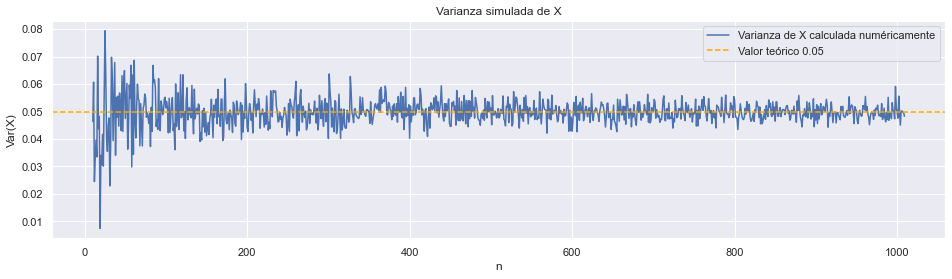

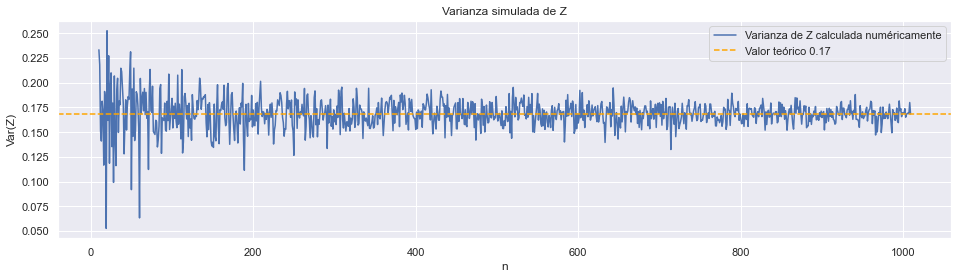

In [107]:

### Gráfico Varianza de X para simulaciones de distintos n's
plt.figure(0, figsize=(16, 4))
plt.plot(n, varX,label='Varianza de X calculada numéricamente')
plt.xlabel('n')
plt.ylabel('Var(X)')
plt.axhline(varX_teo, color='orange', linestyle='--', label='Valor teórico {:.2f}'.format(varX_teo))
plt.legend()
plt.title('Varianza simulada de X')
plt.show()

### Gráfico Varianza de Z para simulaciones de distintos n's
plt.figure(1, figsize=(16, 4))
plt.plot(n, varZ,label='Varianza de Z calculada numéricamente')
plt.xlabel('n')
plt.ylabel('Var(Z)')
plt.axhline(varZ_teo, color='orange', linestyle='--', label='Valor teórico {:.2f}'.format(varZ_teo))
plt.legend()
plt.title('Varianza simulada de Z')
plt.show()


Es posible observar que para ambas variables aleatorias, a medida que aumenta la cantidad de réplicas utilizadas en la simulación, la varianza empírica se acerca más a la teórica. Sin embargo, la simulación siempre presenta un error respecto a la teórica.

### Obtengamos '$n$' tal que el error sea menor a 1% 

Para estimar la cantidad de réplicas necesarias, se considera el error de aproximación como

$$Err(\cdot,n)=\frac{\mathbb V(\cdot)-\mathbb V_{e}(\cdot,n)}{\mathbb V(\ \cdot)}$$

donde $\mathbb V(\cdot)$ corresponde a la varianza teórica de una variable aleatoria, y $\mathbb V_{e}(\cdot,n)$ corresponde a su varianza empírica para una simulación de $n$ réplicas.

Así, se busca el primer $n$ tal que $Err(\cdot,n)) \leq 0,01$.

In [108]:
### Cálculo de n para X
for i in range(len(n)):
    if np.abs((varX_teo - varX[i])/varX_teo) <= 0.01:
        nn_x = n[i]
        break

### Cálculo de n para Z
for i in range(len(n)):
    if np.abs((varZ_teo - varZ[i])/varZ_teo) <= 0.01:
        nn_z = n[i]
        break

print('En las realizaciones hechas se necesita al menos')
print()
print('un n = {} para simular X'.format(nn_x) +' con un error menor al 1%')
print()
print('un n = {} para Z'.format(nn_z) +' con un error menor al 1%')

En las realizaciones hechas se necesita al menos

un n = 77 para simular X con un error menor al 1%

un n = 62 para Z con un error menor al 1%


### Otra interpretación para encontrar 'n' tal que el error de aproximación sea menor al 1%

Es usar el resultado visto en clases: Si $Y_1,Y_2,\dots,Y_n$ son variables aleatorias iid de esperanza finita, y $I_Y = E(Y_1)$, entonces la esperanza del error cuadrático está acotada:

$$E\left( \left| \frac{1}{n}\sum_{k=1}^{n}Y_k - I_Y\right|^2 \right) \leq \frac{1}{n} \mathbb V(Y_1). $$

Con esto, se puede elegir acotar el lado derecho por el $1$ por ciento de $I = \frac{\pi}{4}$, para así obtener una exigencia para $n$,

$$ n \geq \frac{100\cdot 4}{\pi} \mathbb V(Y_1) $$.

Al reemplazar las varianzas de $X$ y $Z$, obtenemos $n_X,n_Z$ respectivamente:

$$ n_X \geq \frac{400}{\pi}0,0498 \approx 7.\quad n_Z \geq \frac{400}{\pi}0,1685 \approx 22.  $$

## Parte 2: 
### Calcular $n$ para aproximar $I$ con diferentes errores y probabilidades

Para estimar la cantidad de réplicas necesarias que se requieren para aproximar $I$ con un error máximo ${Err}_{i}$ y probabilidad ${Pr}_{i}$ para $i=1,2,3$ consideramos

$$n\geq\frac{\sigma^2Z_{\alpha /2}^2}{\epsilon^2}$$

donde $\sigma^2$ corresponde a la varianza teórica de la variable aleatoria  considerada, $Z_{\alpha /2}$ al *score* de la distribución normal para $\alpha/2$, donde $\alpha=1-Pr$, y $\epsilon$ corresponde a $Err$.




In [109]:
# parámetros
Err1 = 0.1 ; Pr1 = 0.9 ; Z010 = sp.stats.norm.ppf(Pr1)
Err2 = 0.01 ; Pr2 = 0.95 ; Z005 = sp.stats.norm.ppf(Pr2)
Err3 = 0.001 ; Pr3 = 0.99 ; Z001 = sp.stats.norm.ppf(Pr3)

### Cálculo de n para X
n_x_1 = varX_teo*(Z010 / Err1)**2 #Err1, Pr1
n_x_2 = varX_teo*(Z005 / Err2)**2 #Err2, Pr2
n_x_3 = varX_teo*(Z001 / Err3)**2 #Err3, Pr3

### Cálculo de n para Z
n_z_1 = varZ_teo*(Z010 / Err1)**2 #Err1, Pr1
n_z_2 = varZ_teo*(Z005 / Err2)**2 #Err2, Pr2
n_z_3 = varZ_teo*(Z001 / Err3)**2 #Err3, Pr3

data = {'Error': [Err1, Err2, Err3], 'Prob': [Pr1, Pr2, Pr3],'$n_X$': np.round([n_x_1, n_x_2, n_x_3], 2), '$n_Z$': np.round([n_z_1, n_z_2, n_z_3], 2)}
NN = pd.DataFrame(data, index=np.arange(1,4))
NN

Error  Prob      $n_X$      $n_Z$
1  0.100  0.90       8.18      27.68
2  0.010  0.95    1347.80    4560.14
3  0.001  0.99  269601.05  912163.38

Es importante mencionar que los $n$ encontrados para ambas variables aleatorias no necesariamente son números enteros, por lo cual se debe considerar siempre el techo del valor encontrado.

Con esto obtenemos:

In [110]:
data = {'Error': [Err1, Err2, Err3], 'Prob': [Pr1, Pr2, Pr3],'$n_X$': np.round([np.ceil(n_x_1), np.ceil(n_x_2), np.ceil(n_x_3)], 2), '$n_Z$': np.round([np.ceil(n_z_1), np.ceil(n_z_2), np.ceil(n_z_3)], 2)}
NN = pd.DataFrame(data, index=np.arange(1,4))
NN

Error  Prob     $n_X$     $n_Z$
1  0.100  0.90       9.0      28.0
2  0.010  0.95    1348.0    4561.0
3  0.001  0.99  269602.0  912164.0

## Parte 3: 
### Aproximar $E(X)$ y $E(Z)$ usando diferentes replicas hasta llegar a $n^*$

Considerando la cantidad de réplicas encontradas previamente para el $Err_{3}$ y $Pr_{3}$, aproximamos la esperanza de ambas variables aleatorias mediante el método de Monte Carlo para distintos $n$'s hasta dicha cantidad de réplicas.

Se realizan las aproximaciones desde 50 réplicas hasta el número deseado con un paso 100.

Adicionalmente, para cada n en cuestión se mide el tiempo que demora en realizarse la simulación.

In [111]:
### Ocupamos el método de Monte Carlo

contador1=0
contador2=0

# generamos un arreglo de distintos n's hasta la cantidad encontrada previamente
nx = np.arange(50, np.ceil(n_x_3), step=100)
nz = np.arange(50, np.ceil(n_z_3), step=100)

expectation_X = np.zeros(len(nx))
tiempo_x = np.zeros(len(nx))

expectation_Z = np.zeros(len(nz))
tiempo_z = np.zeros(len(nz))

# método de Monte Carlo para X
for i in range(len(nx)):
    start = time.time()
    
    # generamos las variables uniformes y X
    np.random.seed(i*int(2**(17))%50150) # setear semilla
    U = np.random.uniform(size=int(nx[i]))
    contador1+=1
    XX = X(U)
    
    # calculamos la esperanza
    expectation_X[i] = np.mean(XX)
    end = time.time()
    tiempo_x[i] = end - start

# método de Monte Carlo para Z
for i in range(len(nz)):
    start = time.time()
    
    # generamos las variables uniformes y Z
    np.random.seed(i*161739 + 1045057467) # setear semilla
    U = np.random.uniform(size=int(nz[i]))
    V = np.random.uniform(size=int(nz[i]))
    contador2+=2
    ZZ = Z(U, V)
    
    #calculamos la esperanza
    expectation_Z[i] = np.mean(ZZ)
    end = time.time()
    tiempo_z[i] = end - start


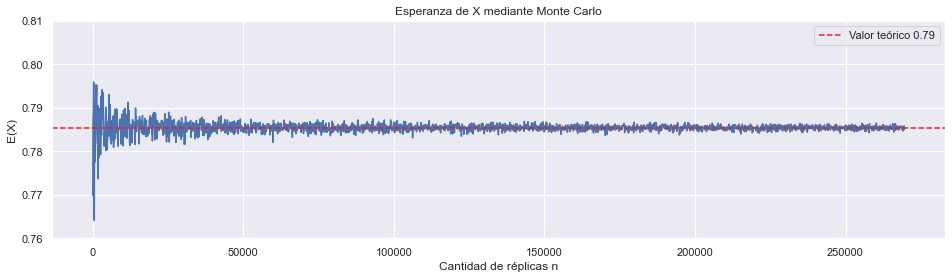

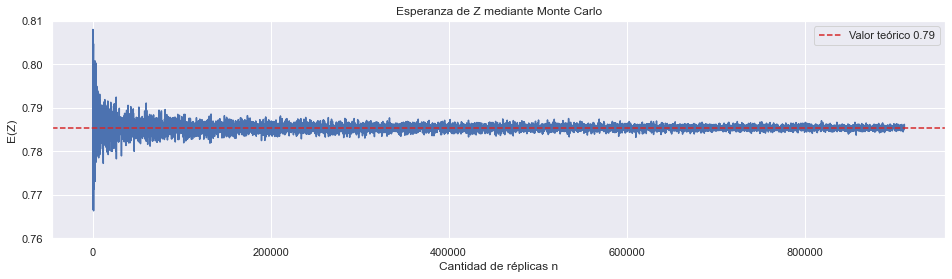

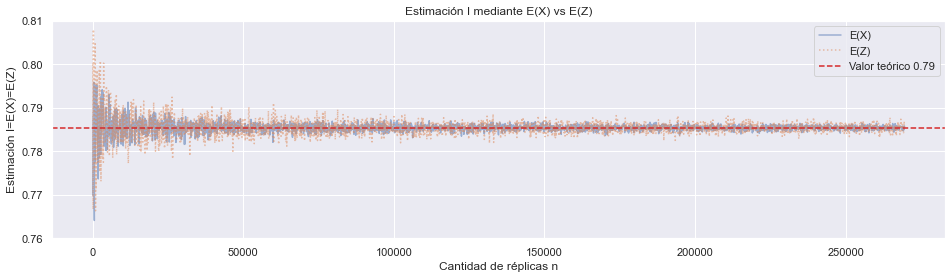

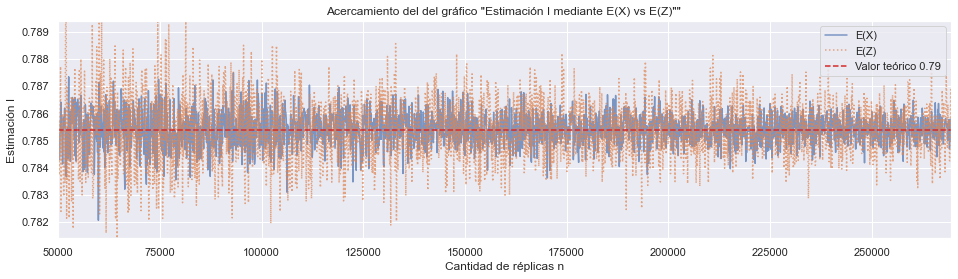

In [112]:
### Gráficos de Esperanzas hasta valor n*

# Esperanza de X en función del número de réplicas
plt.figure(2, figsize=(16, 4))
plt.plot(nx, expectation_X)
plt.ylim(0.76, 0.81)
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('E(X)')
plt.axhline(np.pi / 4, color='tab:red', linestyle='--', label='Valor teórico {:.2f}'.format(np.pi / 4))
plt.title('Esperanza de X mediante Monte Carlo')
plt.legend()
plt.show()

# Esperanza de Z en función del número de réplicas
plt.figure(3, figsize=(16, 4))
plt.plot(nz, expectation_Z)
plt.ylim(0.76, 0.81)
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('E(Z)')
plt.axhline(np.pi / 4, color='tab:red',linestyle='--', label='Valor teórico {:.2f}'.format(np.pi / 4))
plt.title('Esperanza de Z mediante Monte Carlo')
plt.legend()
plt.show()

# Gráfico comparativo entre ambas esperanzas
plt.figure(4, figsize=(16, 4))
plt.plot(nx, expectation_X, label='E(X)',alpha=0.5)
plt.plot(nx, expectation_Z[:len(nx)], label='E(Z)', linestyle='dotted',alpha=0.5)
plt.ylim(0.76, 0.81)
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('Estimación I=E(X)=E(Z)')
plt.title('Estimación I mediante E(X) vs E(Z)')
plt.axhline(np.pi / 4, color='tab:red', linestyle='--', label='Valor teórico {:.2f}'.format(np.pi / 4))
plt.legend()

# Acercamiento del gráfico comparativo entre ambas esperanzas
I_teo = np.pi/4
delta_E = 0.004
plt.figure(5, figsize=(16, 4))
plt.plot(nx, expectation_X, label='E(X)',alpha=0.7)
plt.plot(nx, expectation_Z[:len(nx)], label='E(Z)', linestyle='dotted',alpha=0.7)
plt.xlim(50000, nx[-1])
plt.ylim(I_teo-delta_E,I_teo+delta_E)
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('Estimación I')
plt.title('Acercamiento del del gráfico "Estimación I mediante E(X) vs E(Z)"" ')
plt.axhline(np.pi / 4, color='tab:red', linestyle='--', label='Valor teórico {:.2f}'.format(np.pi / 4))
plt.legend()

plt.show()

A partir de los gráficos presentados en el cuadro anterior es posible observar que para ambas variables aleatorias, la esperanza se acerca bastante al valor teórico a medida que aumentamos el número de réplicas utilizadas en la simulación.

Además, a partir de los gráficos comparativos podemos observar que ambas variables aleatorias $X$ y $Z$ nos permiten estimar $I$, aunque la variable $X$ se mantiene en valores más cercanos. Sin embargo, la diferencia entre ambas estimaciones es pequeña y se presentan como dos métodos viables para resolver el problema. 

### Costo total de aproximar $E(X)$ y $E(Z)$ usando diferentes replicas hasta llegar a $n^*$

Considerando los tiempos de simulación almacenados con anterioridad, se presentan los siguientes gráficos para determinar qué simulación tiene un menor costo total.

Para ello, se realiza una regresión lineal que permite estimar a partir de los datos la función de costo.

In [113]:
### Regresión lineal para los tiempos de ejecución de E(X) y E(Z)

m_x, intercept_x, r_value_x, p_value_x, std_err_x = sp.stats.linregress(nx, tiempo_x)
m_z, intercept_z, r_value_z, p_value_z, std_err_z = sp.stats.linregress(nz, tiempo_z)

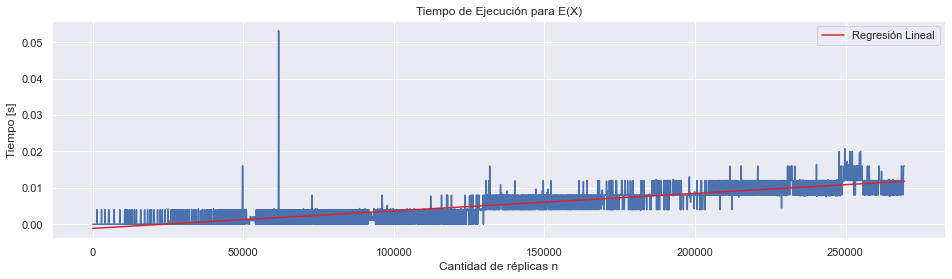

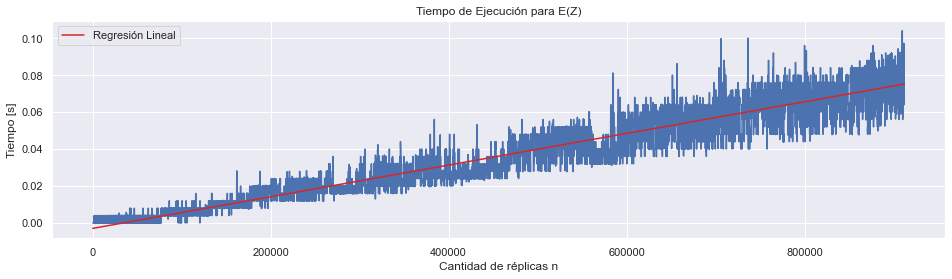

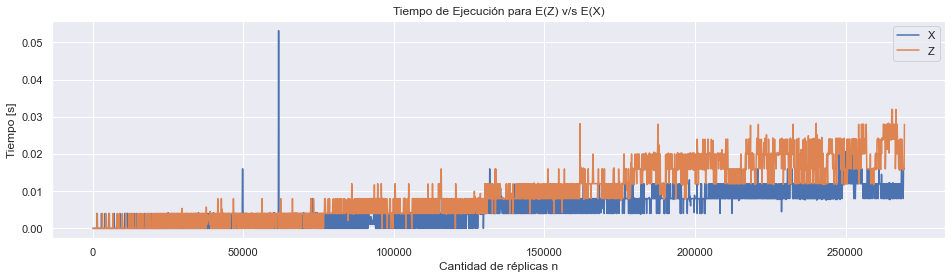

In [114]:
### Gráficos de Tiempos de Ejecucion para E(X), E(Z)) hasta valor n*

# Tiempos de ejecución para E(X)
plt.figure(5, figsize=(16, 4))
plt.plot(nx, tiempo_x)
plt.plot(nx, intercept_x + m_x*nx, color='tab:red', label='Regresión Lineal')
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('Tiempo [s]')
plt.title('Tiempo de Ejecución para E(X)')
plt.legend()
plt.show()

# Tiempos de ejecución para E(Z)
plt.figure(6, figsize=(16, 4))
plt.plot(nz, tiempo_z)
plt.plot(nz, intercept_z + m_z*nz, color='tab:red', label='Regresión Lineal')
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('Tiempo [s]')
plt.title('Tiempo de Ejecución para E(Z)')
plt.legend()
plt.show()

# Gráfico comparativo
plt.figure(7, figsize=(16, 4))
plt.plot(nx, tiempo_x,label='X')
plt.plot(nx, tiempo_z[:len(nx)],label='Z')
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('Tiempo [s]')
plt.title('Tiempo de Ejecución para E(Z) v/s E(X)')
plt.legend()
plt.show()

In [115]:
print('El costo total en función de N para X esta dado por la función t(N) = {0:.2e}*N + {1:.2e}'.format(m_x, intercept_x))
print('El costo total en función de N para Z esta dado por la función t(N) = {0:.2e}*N + {1:.2e}'.format(m_z, intercept_z))
print('donde se observa un menor costo para E(X) dada la pendiente y la intersección con el eje Y')
print()
print('En otros términos, se gasta aproximadamente {0:.4}'.format(m_z/m_x) + ' veces el tiempo por cada réplica de Z, en comparación a X.')

El costo total en función de N para X esta dado por la función t(N) = 4.80e-08*N + -1.14e-03
El costo total en función de N para Z esta dado por la función t(N) = 8.57e-08*N + -2.93e-03
donde se observa un menor costo para E(X) dada la pendiente y la intersección con el eje Y

En otros términos, se gasta aproximadamente 1.784 veces el tiempo por cada réplica de Z, en comparación a X.


En base a los tiempos de simulación presentados en los gráficos anteriores y la función de costo total dada por la regresión lineal, el método de Monte Carlo utilizando la variable aleatoria $X$ se presenta como el método mas viable.

## Parte 4:

### Calculamos intervalos de confianza para $I$.

En general, utilizamo el promedio de las variables $Y_1,Y_2,\dots,Y_n$ para estimar $I = E(Y_1)$. Denotamos $Y_n = \frac{1}{n}\displaystyle\sum_{k=1}^n Y_k,\ \sigma^2=\mathbb V(Y_1)$. Recordamos que para $n$ grande, el Teorema Central del Límite proporciona un intervalo de confianza aproximado para $I$:

$$ \mathbb P( Y_n - \frac{\sigma}{\sqrt n} z_{\alpha/2} \leq I \leq Y_n + \frac{\sigma}{\sqrt n} z_{\alpha/2} ) \approx 1-\alpha ,$$

siempre que se cumpla que $\alpha\in(0,1)$,$z_{\alpha/2}$ sea tal que $\mathbb P(N(0,1) > z_{\alpha/2}) = \frac{\alpha}{2}$. Luego, si usamos el $n$ estimado en la parte 2 de este problema y los valores teóricos de las varianzas, podemos obtener numéricamente los intervalos de confianza.

En este caso consideraremos intervalos de confianza para $Err_{3}=0.001$ y $Pr_{3}=0.99$.

In [116]:
### Calculemos los intervalos de confianza

# es necesario explicitar los parámetros para estimar los n_X, n_Z a usar
# también hay que calcular numéricamente la esperanza y varianza de X y Z

# parámetros
Err3 = 0.001 ; Pr3 = 0.99 ; Z001 = sp.stats.norm.ppf(Pr3)

n_x_3 = varX_teo*(Z001 / Err3)**2
n_z_3 = varZ_teo*(Z001 / Err3)**2

### Calculamos la esperanza y varianza de X y Z

# X
start = time.time()

# generamos las variables uniformes y X

np.random.seed(45461+ 2**11) # setear semilla
U = np.random.uniform(size=int(np.ceil(n_x_3)))
XX = X(U)

#calculamos su esperanza y varianza
expectation_X = np.mean(XX)
varX = np.var(XX, ddof=1)

end = time.time()
tiempo_X = end - start

# Z
start = time.time()

# generamos las variables uniformes y Z

np.random.seed(848621) # setear semilla
U = np.random.uniform(size=int(n_z_3))
V = np.random.uniform(size=int(n_z_3))
ZZ = Z(U, V)

#calculamos su esperanza y varianza
expectation_Z = np.mean(ZZ)
varZ = np.var(ZZ, ddof=1)

end = time.time()
tiempo_Z = end - start

### Cálculo de los intervalos de confianza.

# calculamos los intervalos de confianza de acuerdo a la fórmula
# proporcionada por el teorema central del límite
valores_inferior = [expectation_X-np.sqrt(varX/np.ceil(n_x_3))*Z001,expectation_Z-np.sqrt(varZ/np.ceil(n_z_3))*Z001]
valores_superior = [expectation_X+np.sqrt(varX/np.ceil(n_x_3))*Z001,expectation_Z+np.sqrt(varZ/np.ceil(n_z_3))*Z001]

# otros datos
I_teo = np.pi/4
ancho_intervalo = [2*np.sqrt(varX/np.ceil(n_x_3))*Z001,2*np.sqrt(varZ/np.ceil(n_z_3))*Z001]
err_est_X = abs(I_teo-expectation_X)
err_est_Z = abs(I_teo-expectation_Z)


## anotamos los valores en una tabla.
data = {'Método': ['$X$', '$Z$'],
        '': ['',''],
        'Intervalo:': ['',''],
        'Valor inferior': valores_inferior,
        'Valor superior': valores_superior,
        '': ['',''],
        'Tiempo de simulación': ['{0:.2e}'.format(tiempo_X),'{0:.2e}'.format(tiempo_Z)],
        'Valor esperado': ['{0:.8}'.format(expectation_X),'{0:.8}'.format(expectation_Z)],
        'Error de estimación': ['{0:.3e}'.format(err_est_Z),'{0:.3e}'.format(err_est_Z)],
        'Ancho del intervalo (precisión) ': ancho_intervalo}
NN = pd.DataFrame(data)
NN

Método   Intervalo:  Valor inferior  Valor superior Tiempo de simulación  \
0    $X$                     0.783978        0.785979             2.31e-02   
1    $Z$                     0.785226        0.787223             7.60e-02   

  Valor esperado Error de estimación  Ancho del intervalo (precisión)   
0     0.78497846           8.264e-04                          0.002002  
1     0.78622461           8.264e-04                          0.001997

Se puede observar que el error de estimación y la precisión obtenida es casi idéntica, al igual que el valor esperado. Las diferencias de ambas magnitudes comienza al menos en el tercer dígito significativo.

Notar también que el tiempo que requiere el método $Z$ para lograr la misma precisión que con el método $X$ es bastante superior. 

Evidentemente, el método que utiliza $X$ es el más eficiente en términos de precisión y tiempos de simulación.

A continuación se presenta una tabla que presenta las diferencias entre ambos métodos.

In [117]:
data2 = {'Diferencia del ancho del intervalo de confianza': ['{0:.3e}'.format(abs(2*np.sqrt(varX/n_x_3)*Z001-2*np.sqrt(varZ/n_z_3)*Z001))],
    'Diferencia del valor esperado': ['{0:.3e}'.format(abs(expectation_X-expectation_Z))],
         'Proporción de tiempo usado por $Z$ c/r a $X$': ['{0:.3e}'.format(tiempo_Z/tiempo_X)]
       }
MM = pd.DataFrame(data2)
MM

Diferencia del ancho del intervalo de confianza  \
0                                       4.550e-06   

  Diferencia del valor esperado Proporción de tiempo usado por $Z$ c/r a $X$  
0                     1.246e-03                                    3.292e+00

### Cálculo del ratio de eficiencia
Recordemos que el costo total se define por $C_{T}(X) = C_{r} \ \cdot \ \mathbb{V}(X) $, donde $C_{r}$ corresponde al costo por réplica, *ie*, el tiempo total de simulación dividido por la cantidad de réplicas simuladas.

In [118]:
### Cálculo de costos totales

# costos por réplica
i = len(nx) - 1
costo_x = tiempo_x[i] / nx[i]
costo_z = tiempo_z[i] / nz[i]

#costos totales
print('Costo total para X = {:.2e}'.format(costo_x*varX_teo))
print('Costo total para Z = {:.2e}'.format(costo_z*varZ_teo))

Costo total para X = 2.96e-09
Costo total para Z = 1.75e-08


In [119]:
### Ratio de eficiencia
print('1/Ratio de Eficiencia = {:.4f}'.format(costo_x*varX_teo / (costo_z*varZ_teo)))
print()
print('Ratio de Eficiencia = {:.4f}'.format(costo_z*varZ_teo / (costo_x*varX_teo)))

1/Ratio de Eficiencia = 0.1692

Ratio de Eficiencia = 5.9085


A partir de los costos totales y el *ratio* de eficiencia, se puede decir que $X$ es aproximadamente 6 veces más eficiente que $Z$.

## Parte 5: 
### Cálculo del costo teórico en cantidad de v.a. uniformes simuladas

En las partes anteriore se estimaron la canatidad de réplicas necesarias para aproximar $E(X)$ y $E(Z)$ y obtener un error $\text{Err} = 0,001$ con probabilidad $\text{Pr}=99\%$. 
Ahora consideraremos la cantidad de variables uniformes que requiere cada método, para ello hay que recordar que $Z$ ocupa el doble de uniformes que $X$.

In [120]:
# parámetros
Err3 = 0.001 ; Pr3 = 0.99 ; Z001 = sp.stats.norm.ppf(Pr3)

n_x_3 = varX_teo*(Z001 / Err3)**2
n_z_3 = varZ_teo*(Z001 / Err3)**2

# número va uniformes requeridas por X y Z
uniformes_x = np.ceil(n_x_3)
uniformes_z = np.ceil(n_z_3)*2 # hay que usar dos unifomes por cada Z.

data3 = { "Uniformes usadas en el método con $X$": ['{0:.2e}'.format(uniformes_x)],
         "Uniformes usadas en el método con $Z$": ['{0:.2e}'.format(uniformes_z)],
        "Ratio entre ellas (X/Z)": ['{0:.2}'.format(uniformes_x/uniformes_z)] 
        }
pd.DataFrame(data3)

Uniformes usadas en el método con $X$ Uniformes usadas en el método con $Z$  \
0                              2.70e+05                              1.82e+06   

  Ratio entre ellas (X/Z)  
0                    0.15

En cálculos anteriores se cuantifico con cuántos valores en la práctica para lograr la precisión en las variables $\text{contador1,contador2}$ así que además se pueden respaldar los resultados con datos reales de simulaciones.

In [121]:
data3 = { "Uniformes usadas en la práctica en el método con $X$": ['{0:.2e}'.format(int(contador1))],
         "Uniformes usadas en la práctica en el método con $Z$": ['{0:.2e}'.format(int(contador2))],
        "Ratio entre ellas": ['{0:.2}'.format(contador1/contador2)] 
        }
pd.DataFrame(data3)

Uniformes usadas en la práctica en el método con $X$  \
0                                           2.70e+03     

  Uniformes usadas en la práctica en el método con $Z$ Ratio entre ellas  
0                                           1.82e+04                0.15

Podemos notar que los valores tienen distinto orden de magnitud, pero mantienen el *ratio*. Esto ocurre porque en la implementación se consideraron cantidades de réplicas a paso 100, por lo tanto ambos contadores están dos ordenes de magnitud bajo los valores reales.

Finalmente, a partir de las simulaciones realizadas, sus resultados, los gráficos presentados y los costos calculados, se concluye que utilizar el método de Monte Carlo con la variable aleatoria $X$ es más eficiente y preciso para estimar $I$ que utilizarlo con la variable aleatoria $Z$.

# P3
## Parte 1:
### DiscreteQuantile

In [122]:
### DiscreteQuantile
def DiscreteQuantile(f, u):
    """
    params
    f:  funcion de masa discreta (debe retornar un float)
    u:  vector en [0, 1]^r

    return menor vector n tal que \sum_{j=0}^{n_i} f(j) \geq u_i
    """

    n = np.zeros(len(u))

    for i in range(len(u)):
        n_i = 0

        while np.sum(f(np.arange(n_i+1))) < u[i]:
            n_i += 1

        n[i] = n_i

    return n

## Parte 2:
### DiscreteQuantileF

In [123]:
### DiscreteQuantile
def DiscreteQuantileF(F, u):
    """
    params
    F:     funcion de distribucion
    u:     vector en [0, 1]^r

    return menor vecto 'n' en [0, 1]^r tal que F(n_i) \geq u_i
    """

    n = np.zeros(len(u))

    for i in range(len(n)):
        n_i = 0

        while F(n_i) < u[i]:
            n_i += 1

        n[i] = n_i
    return n

## Parte 3:
### ContinuousQuantile

In [124]:
### ContinuousQuantile
def ContinuousQuantile(F,f,u, error=1e-4):
    """
    Metodo que retorna 'x' tal que |F(x_i) - u_i|\leq error
    ocupando el metodo de Newton.

    params
    F:     funcion de distribucion
    f:     funcion de densidad de F
    u:     vector en [0, 1]^r

    return 'x' tal que |F(x_i) - u_i|\leq error
    """
    r = len(u)
    x = np.zeros(r)
    for i in range(r):
        x_i = 0.5
        while True:
            if abs(F(x_i)-u[i]) <= error:
                break
            else:
                x_i -= (F(x_i)-u[i])/f(x_i)
        x[i] = x_i 
    return x

## Parte 4:

### Implementación de las funciones

Consideramos una variable aleatoria discreta $X$ tal que

$$\mathbb P(X=j)=(0.5)^j \; j\geq1$$.

Se implementan los tres métodos descritos por las funciones y para ello se define la función de densidad discreta de $X$, $f_{d}(j)$, la función de densidad continua de $X$, $f_{c}(x)$ y la función de distribución de $X$, $F(x)$:

$$f_{d}(j)=\mathbb1_{j\geq1}(0.5)^j$$
$$f_{c}(x)=ln(2)(0.5)^x$$
$$F(x)=1-(0.5)^x$$

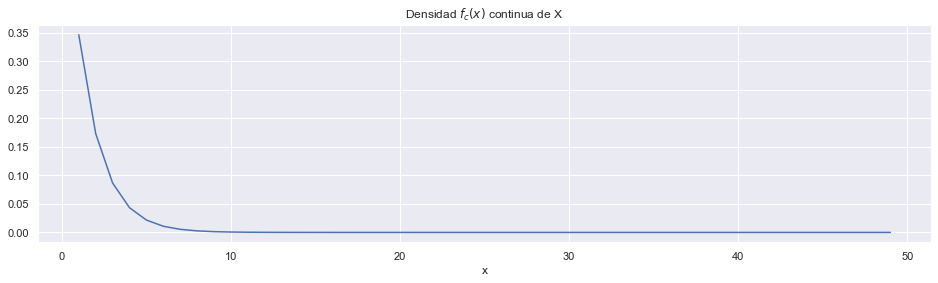

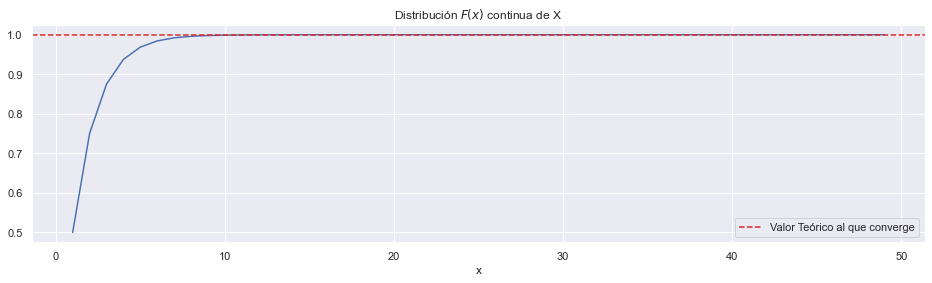

In [125]:
import math

def densidad(j): return (j>=1)*(0.5)**j 

def densidad_cont(x):return np.log(2)*(0.5**x)

def distribucion(x): return (1 - (1/2)**x)

x = np.arange(1, 50)
distribucion(x)

#gráfico de desnisdad continua
plt.figure(7, figsize=(16,4))
plt.plot(x, densidad_cont(x))
plt.title('Densidad $f_{c}(x)$ continua de X')
plt.xlabel('x')
plt.show()

#gráfico de distribución
plt.figure(8, figsize=(16,4))
plt.plot(x, distribucion(x))
plt.title('Distribución $F(x)$ continua de X')
plt.axhline(1, color='tab:red', label='Valor Teórico al que converge', linestyle='--')
plt.xlabel('x')
plt.legend()
plt.show()

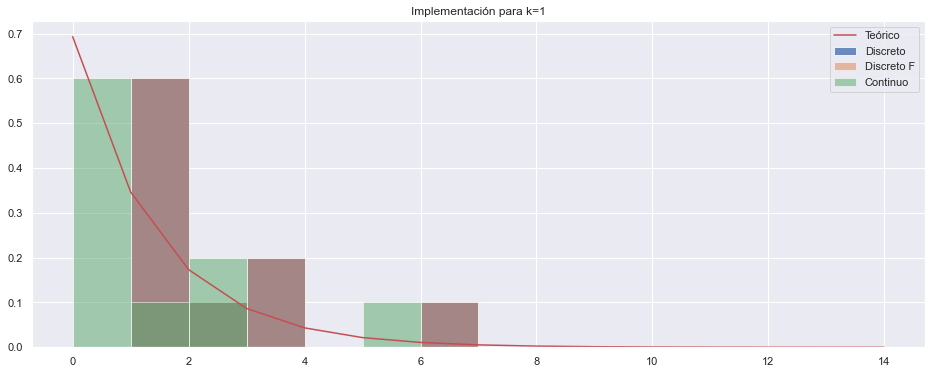

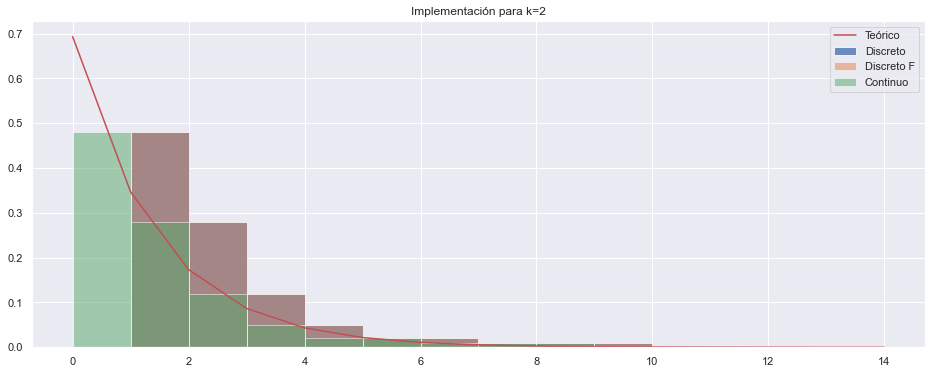

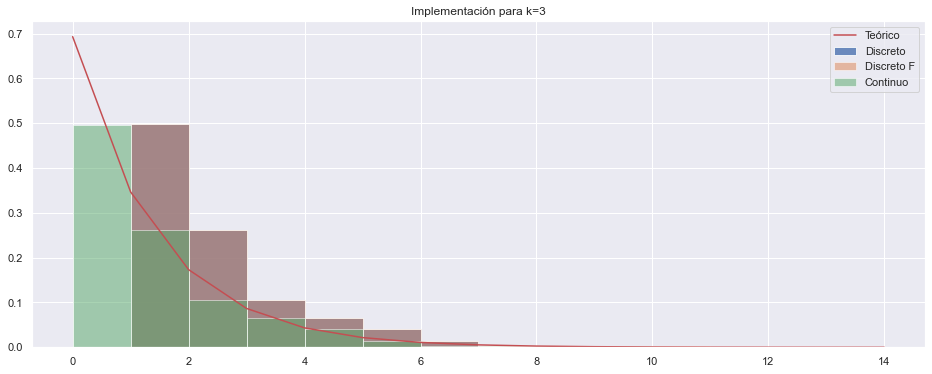

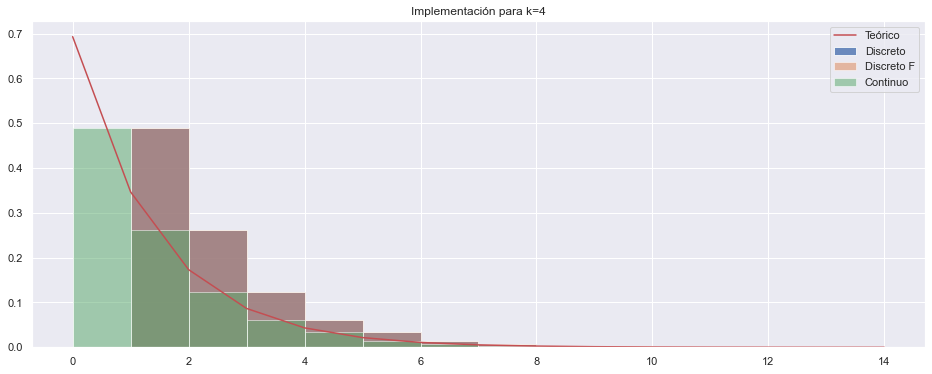

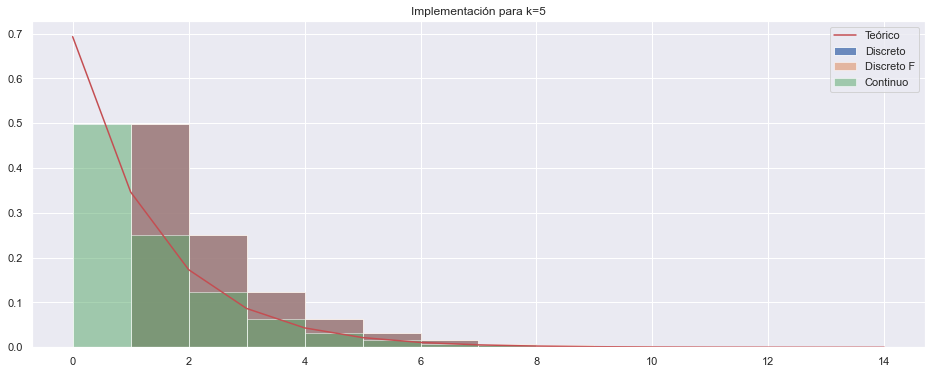

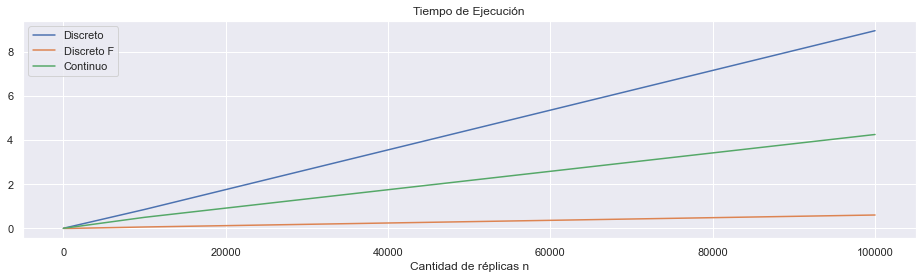

Para k=5 se obtienen los siguientes costos por réplica


Costo Discreto  Costo DiscretoF  Costo Continuo
0         0.00009         0.000006        0.000006

In [126]:
### Implementación de los tres métodos

t1 = np.zeros(5)

t2 = np.zeros(5)

t3 = np.zeros(5)

## k=1,...,5
for k in np.arange(1, 6):
    n = 10**k # cantidad de va uniformes

    # generar va uniformes

    np.random.seed(715638*i) # setear semilla
    U = np.random.uniform(size=n)
    np.random.seed(k*12)
    
    # implementación DiscreteQuantile
    start = time.time()
    cuantil_discreto = DiscreteQuantile(densidad, U)
    end = time.time()
    t1[k-1] = end - start
    
    # implementación DiscreteQuantileF
    start = time.time()
    cuantil_discreto_F = DiscreteQuantileF(distribucion, U)
    end = time.time()
    t2[k-1] = end - start
    
    # implementación ContinuousQuantile
    start = time.time()
    cuantil_continuo = ContinuousQuantile(distribucion, densidad_cont, U)
    end = time.time()
    t3[k-1] = end - start
    
    # gráfico de los tres métodos
    plt.figure(8+k, figsize=(16, 6))
    plt.hist(cuantil_discreto, bins=np.arange(15), alpha=0.8, label='Discreto', density=True)
    plt.hist(cuantil_discreto_F, bins=np.arange(15), alpha=0.5, label = 'Discreto F', density=True)
    plt.hist(cuantil_continuo, bins=np.arange(15), alpha=0.5, label='Continuo', density=True)
    plt.plot(np.arange(15), densidad_cont(np.arange(15)), label='Teórico')
    plt.title('Implementación para k={}'.format(k))
    plt.legend()
    plt.show()

kk = np.arange(1, 6)
nn = 10**kk

#gráfico de tiempo de ejecucuión
plt.figure(14, figsize=(16, 4))
plt.plot(nn, t1, label='Discreto')
plt.plot(nn, t2, label='Discreto F')
plt.plot(nn, t3, label='Continuo')
plt.title('Tiempo de Ejecución')
plt.xlabel('Cantidad de réplicas n')
plt.legend()
plt.show()

print('Para k=5 se obtienen los siguientes costos por réplica')
data = {'Costo Discreto': [t1[-1] / nn[-1]], 'Costo DiscretoF': [t2[-1] / nn[-1]], 'Costo Continuo': [t2[-1] / nn[-1]]}

pd.DataFrame(data)


A partir de los gráficos anteriores se observan los mismos resultados para los métodos *DiscreteQuantile* y *DiscreteQuantileF*. Sin embargo, a pesar que la forma de *ContinuousQuantile* coincide con la de los dos métodos anteriores, los resultados están desplazados hacia la derecha.

Creemos que esto ocurre puesto que la variable aleatoria es discreta y no se comporta bien cuando se describe de forma continua.

Claramente, a medida que aumenta el $k$, y con ello el número de réplicas, la simulación *DiscreteQuantile* y *DiscreteQuantileF* se acercan más a los valores teóricos.

Por otra parte, cabe destacar que en términos de tiempo y costo por réplica, la simulación *DiscreteQuantileF* es la más eficiente, y luego *ContinuousQuantile* que tiene costo por réplica similar, pero mayor tiempo de ejecución, y finalmente *DiscreteQuantile* que tiene mayor costo por réplica y tiempo de ejecución.

A continuación se presentan los gráficos desagregados para cada función.

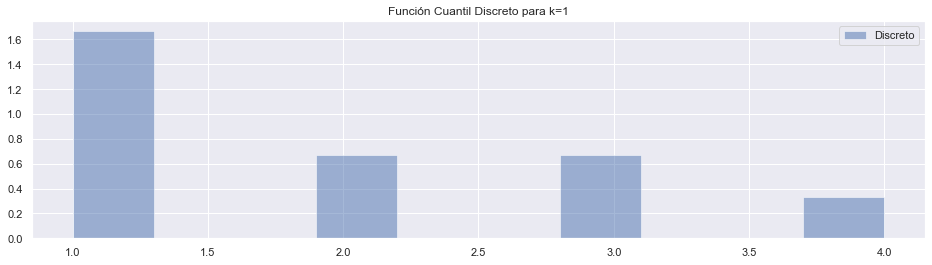

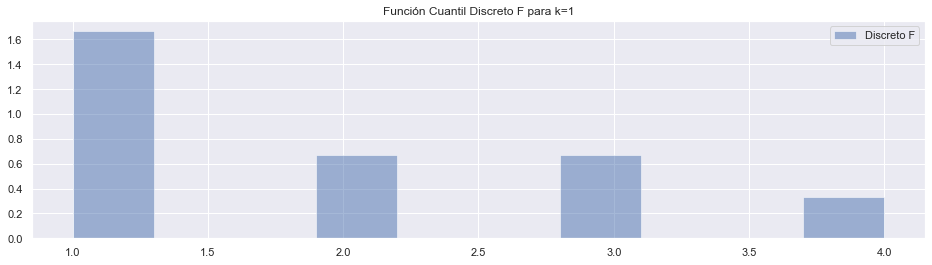

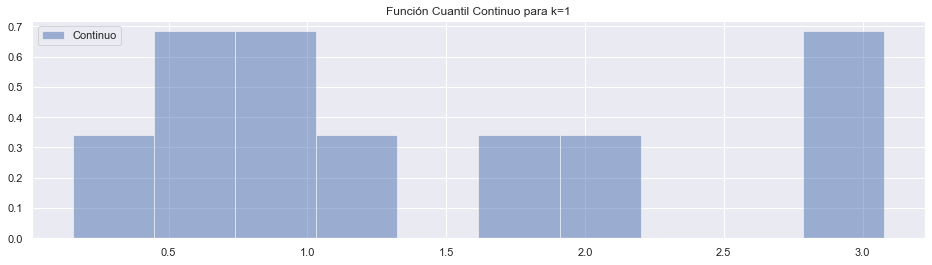

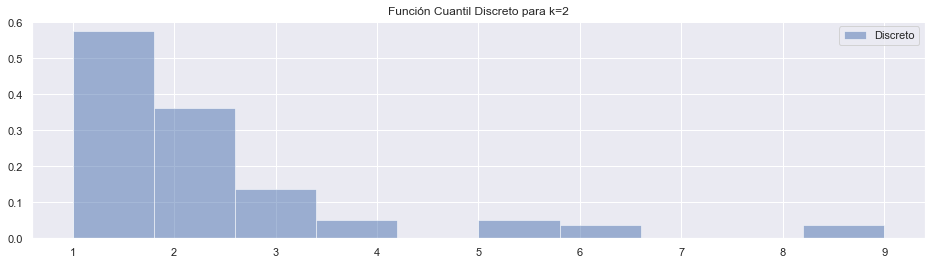

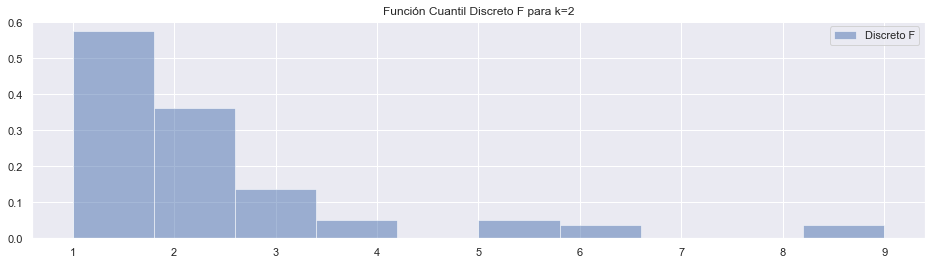

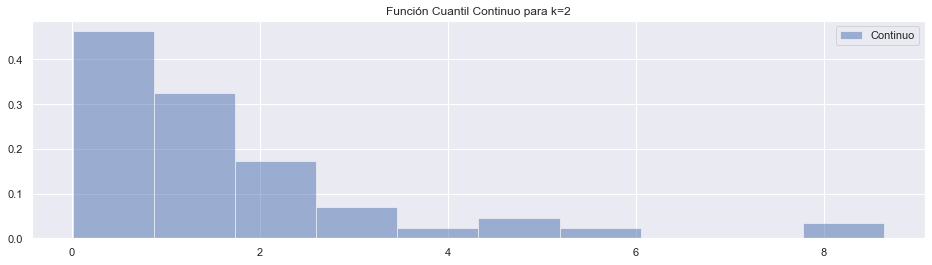

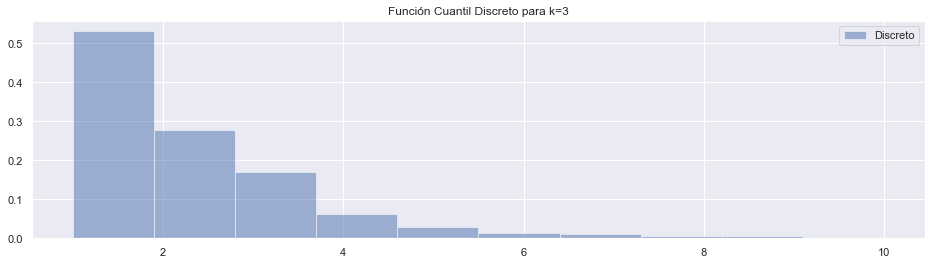

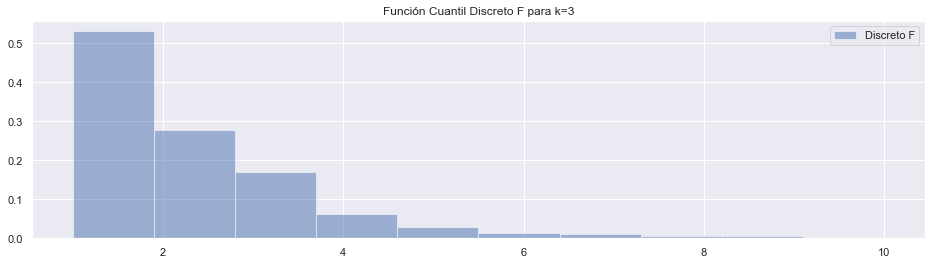

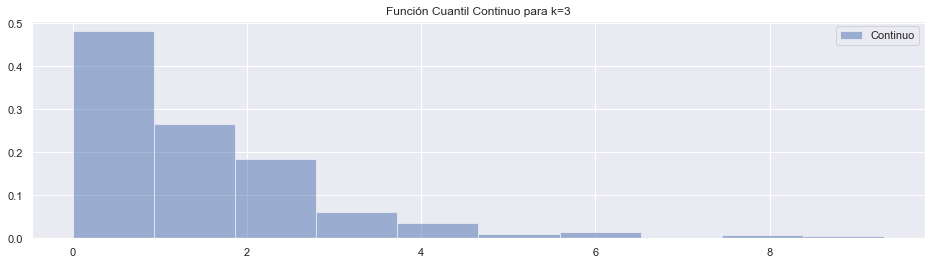

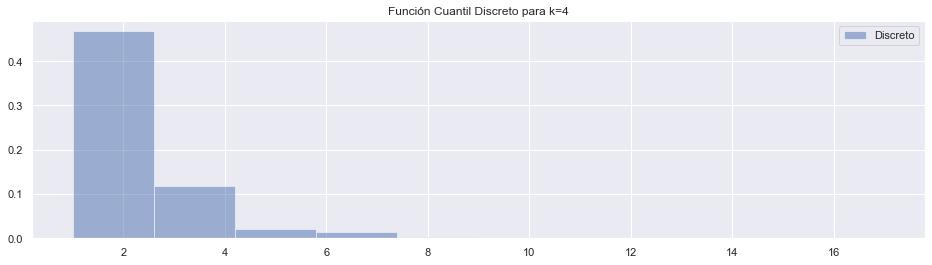

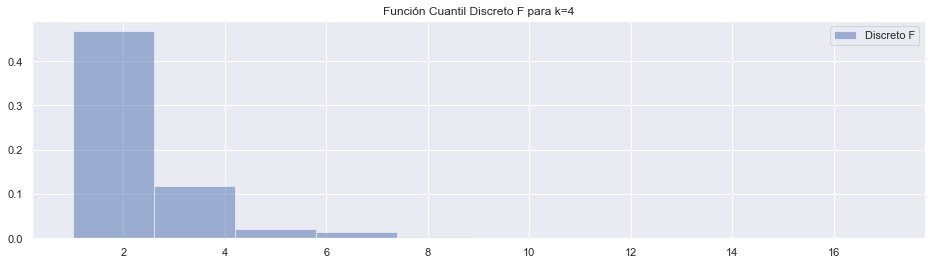

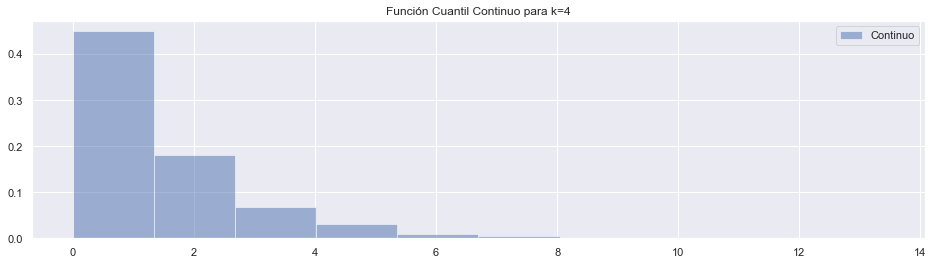

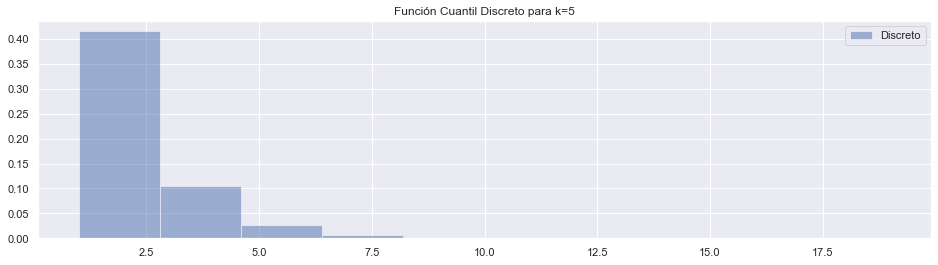

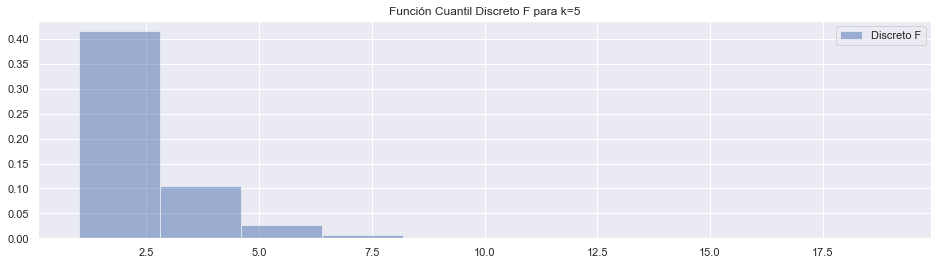

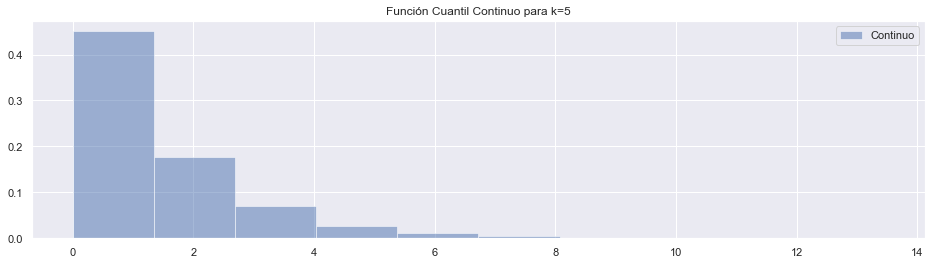

In [127]:
t1 = np.zeros(5)

t2 = np.zeros(5)

t3 = np.zeros(5)

## k=1,...,5
for k in np.arange(1, 6):
    n = 10**k # cantidad de uniformes
    
    # generamos las va uniformes
    np.random.seed(k*48814675)
    U = np.random.uniform(size=n)
    
    # implementación DiscreteQuantile
    start = time.time()
    cuantil_discreto = DiscreteQuantile(densidad, U)
    end = time.time()
    t1[k-1] = end - start

    # implementación DiscreteQuantileF
    start = time.time()
    cuantil_discreto_F = DiscreteQuantileF(distribucion, U)
    end = time.time()
    t2[k-1] = end - start

    # implementación ContinuousQuantile
    start = time.time()
    cuantil_continuo = ContinuousQuantile(distribucion, densidad_cont, U)
    end = time.time()
    t3[k-1] = end - start
    
    # gráfico DiscreteQuantile para k
    plt.figure(8+k, figsize=(16, 4))
    plt.hist(cuantil_discreto, alpha=0.5, label='Discreto', density=True)
    plt.title('Función Cuantil Discreto para k={}'.format(k))
    plt.legend()
    plt.show()

    # gráfico DiscreteQuantileF para k
    plt.figure(9+2*k, figsize=(16, 4))
    plt.hist(cuantil_discreto_F, alpha=0.5, label = 'Discreto F', density=True)
    plt.title('Función Cuantil Discreto F para k={}'.format(k))
    plt.legend()
    plt.show()

    # gráfico ContinuousQuantile para k
    plt.figure(10+3*k, figsize=(16, 4))
    plt.hist(cuantil_continuo, alpha=0.5, label='Continuo', density=True)
    plt.title('Función Cuantil Continuo para k={}'.format(k))
    plt.legend()
    plt.show()
    



## Parte 5:

Por lo expuesto con anterioridad se considera el método *DiscreteQuantileF* como el más eficiente.

A continuación se realizan las simulaciones exclusivamente con este método y se calcula la media y varianza muestreal para cada implementación.

Estas medias y varianzas se comparan con los valores teóricos, considerando que la v.a. $X$ es una v.a. geométrica de parámetro $0.5$, se tiene que su media y su varianza es $2$.


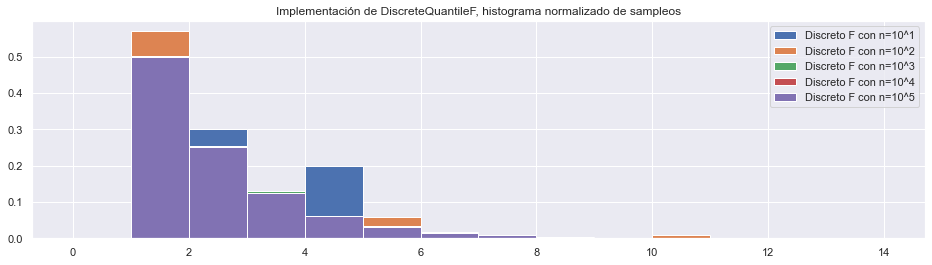

In [128]:
### Implementación DiscreteQuantileF
cuantiles = []

plt.figure(15, figsize=(16, 4))

## k=1,...,5
for k in np.arange(1, 6):
    n = 10**k # cantidad de uniformes

    # generamos las va uniformes 
    U = np.random.uniform(size=n)
    np.random.seed(2**k*3 + 453453)

    # implementación DiscreteQuantileF
    start = time.time()
    cuantil_discreto_F = DiscreteQuantileF(distribucion, U)
    end = time.time()
    t2[k-1] = end - start

    cuantiles.append(cuantil_discreto_F)
    
    # gráfico implementación
    plt.hist(cuantil_discreto_F, bins=np.arange(15), label = 'Discreto F con n=10^{}'.format(k), density=True)
    plt.title('Implementación de DiscreteQuantileF, histograma normalizado de sampleos')

plt.legend()
plt.show()



In [129]:
## Calculo varianza y esperanza

varianzas = np.zeros(5)
medias = np.zeros(5)

for i in range(5):
    varianzas[i] = cuantiles[i].var()
    medias[i] = cuantiles[i].mean()

data = {'Varianzas muestrales': varianzas, 'Medias muestrales': medias}
print(pd.DataFrame(data, index=np.arange(1, 6)))
print('Valor teórico: Media = 2        Varianza = 2')

   Varianzas muestrales  Medias muestrales
1              1.290000            2.10000
2              2.037900            1.89000
3              1.925936            1.99200
4              2.081650            2.00710
5              1.989501            1.99695
Valor teórico: Media = 2        Varianza = 2


A partir del gráfico podemos observar que a medida que aumentamos la cantidad de réplicas en un orden de magnitud, la simulación entrega resultados cada vez más cercanos a los esperados.

Notemos además, que sus varianzas y medias muestreales a partir de $k=3$ ya se encuentran a centésimas del valor teórico.

# P4
## Parte 1:

Para resolver esta pregunta implementaremos un método de *aceptación-rechazo*. Para ello, será importante ver que $K$ (y, por tanto, que $\alpha(K)$) serán viables para poder elegir como parámetros.

En el primer método (construcción a partir de Uniformes discretas de parámetro $s$) ocurre que

$$\mathbb{P}(U=k)=\frac{1}{s+1},\forall k \in \{0,1,2,\ldots,s\}$$

Sin embargo, esto es tremendamente conveniente, pues

$$(s+1)\cdot \mathbb{P}(U=k)=1,\forall k \in \{0,1,2,\ldots,s\}$$

Así, al mirar $\alpha(k)$, como queremos que sea menor o igual a $1$ y tenga forma $\frac{\mathbb{P}Y_{\lambda,s}=k}{K \cdot \mathbb{P}(U=k)}$. Sería ideal escoger $K=s+1$

$$\alpha(k)=\frac{\mathbb{P}(U=k)}{K\cdot\mathbb{P}(U=k)}=\frac{\mathbb{P}(U=k)}{(s+1)\cdot\mathbb{P}(U=k)}=\mathbb{P}(U=k)$$

Siendo ese el $\alpha(k)$ a usar.

Por otro lado, para las Poisson, notamos que si $P$ es una variable Poisson de parámetro $\lambda$,

$$\mathbb{P}(Y_{\lambda,s}=k)=\frac{\mathbb{P}(P=k)}{\displaystyle\sum_{j=0}^se^{-\lambda}\frac{\lambda^j}{j!}}\leq1$$

Así, podemos considerar

$$\alpha(k)=\frac{\mathbb{P}(Y_{\lambda,s}=k)}{K\cdot\mathbb{P}(P=k)}$$

Considerando que la simulación se realizará para $\lambda=1$ y $s=8$, tenemos que en este caso, $K=1$ será suficiente.

Puesto que en tal caso, 

$$\alpha(k)=\frac{\mathbb{P}(Y_{\lambda,s}=k)}{\mathbb{P}(P=k)}=\frac{1}{\displaystyle\sum_{j=0}^se^{-\lambda}\frac{\lambda^j}{j!}}$$

y como $\lambda=1$,

$$\displaystyle\sum_{j=0}^se^{-\lambda}\frac{\lambda^j}{j!} \approx e$$

entonces tenemos $\alpha(k)\leq1$.

Cabe destacar que para la implementación del método es importante definir una función auxiliar que genere variables aleatorias Poisson($\lambda$) a partir de variables aleatorias Uniformes:

$$P:=sup\{n\in\mathbb{N}:\;-\displaystyle\sum_{i=1}^nln(U_{i})<\lambda\}$$ 

In [130]:
### Implementación aceptación-rechazo para ambas variables

# densidad de Y_\lambda,s
def densidad(k, lambd=1, s=8):
    numerador = np.exp(-lambd)*lambd**k / np.math.factorial(k)
    denominador = 0

    for j in range(s+1):
        denominador += np.exp(-lambd)* lambd**j / np.math.factorial(j)

    return numerador / denominador

k = np.arange(9)
d = [densidad(i) for i in k]

# Esto genera una variable aleatoria Poisson a partir desde una uniforme [0,1]
def poisson_unif(lamb=1,counter=0):
    N = -1
    suma = 0
    while suma < lamb:
        U = np.random.uniform()
        counter+=1
        suma += -np.log(U)
        N += 1
    return N,counter

# Ahora, crearemos una función que genere el sampling desde uniformes discretas de parámetro s
# así como también a partir de las Poisson generadas desde la función definida anteriormente
def samplings(n=10000,s=8,lamb=1,counter1=0,counter2=0):
    start = time.time()
    Y_N = []
    
    # aceptación-rechazo a partir de uniformes
    while len(Y_N) < n:
        
        #np.random.seed(71533 - int(counter1/10334))     # quitar/comentar para simulaciones no reproducibles
        Y = np.random.randint(0, s)
        U = np.random.uniform()
        counter1+=2
        if U <= densidad(Y):
            Y_N.append(Y)
    
    t1= time.time()
    P_N = []        
    
    # aceptación-rechazo a partir de poisson
    while len(P_N) < n:

        #np.random.seed(counter2 + 27)             # quitar/comentar para simulaciones no reproducibles
        poi=poisson_unif()
        Y = poi[0]
        counter2+=poi[1]
        U = np.random.uniform()
        counter2+=1
        if U <= densidad(Y)/(np.exp(-lamb)*lamb**Y / np.math.factorial(Y)) :
            P_N.append(Y)
    end = time.time()
    return Y_N, P_N, t1 - start, end - t1,counter1,counter2



Nos damos un sampleo fijo para cada método, y así poder obtener tiempos y muestras para hacer análisis con ellos.

In [131]:
simulacion = samplings(n=10000)

Veamos unos histogramas que muestran la comparación entre las simulaciones realizada desde la densidad uniforme y la Poisson. Así como también los tiempos que demora en realizar la simulación a través de cada método.

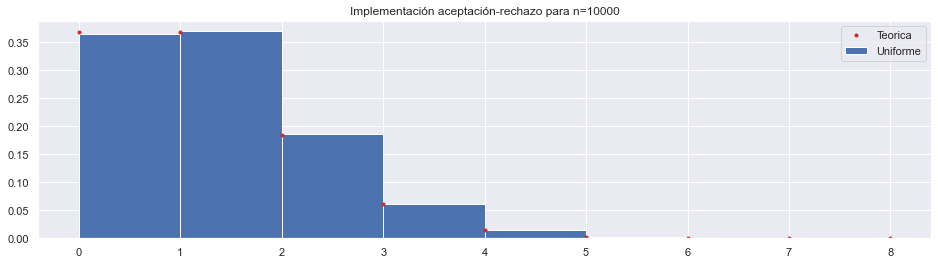

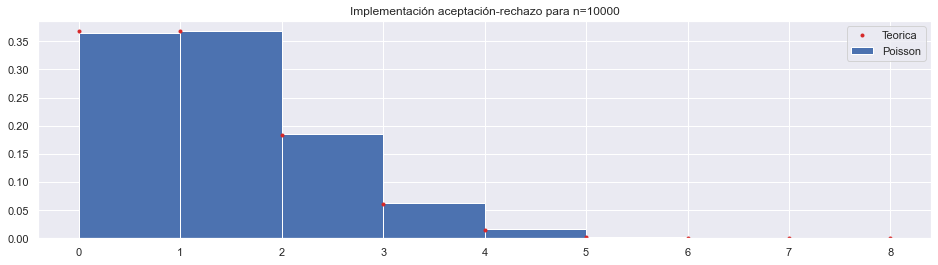

El tiempo que demora el método para las v.a. Uniformes es 7.887763261795044 [s]
y el tiempo que demora para lasv.a. Poisson es 1.3679876327514648 [s]


In [132]:
### Gráfico de simulacion para n=10000
plt.figure(16, figsize=(16, 4))
plt.hist(simulacion[0], bins=np.arange(9), label='Uniforme', density=True)
plt.plot(k, d,'.', color='tab:red', label='Teorica')
plt.title('Implementación aceptación-rechazo para n=10000')
plt.legend()
plt.show()
plt.figure(17, figsize=(16, 4))
plt.hist(simulacion[1], bins=np.arange(9), label='Poisson', density=True)
plt.plot(k, d,'.', color='tab:red', label='Teorica')
plt.title('Implementación aceptación-rechazo para n=10000')
plt.legend()
plt.show()
print('El tiempo que demora el método para las v.a. Uniformes es',simulacion[2],'[s]')
print('y el tiempo que demora para lasv.a. Poisson es',simulacion[3], '[s]')

Respecto a la eficiencia, además de los números obtenidos anteriormente los $K$ escogidos para el método de aceptación rechazo son:
- $K= s+1 = 9$ para el caso de la uniforme discreta con parámetro $s$
- $K=1$ para el caso de las distribuciones Poisson

A partir de esta información, se concluye que el método implementado con variables Poisson es más eficiente.

Además, simularemos una muestra real para compararla con las obtenidas a través de nuestros métodos para ver qué tanto se parecen

In [133]:
# Muestra real

def sim_real_n(n):
    sim_real=[]
    for i in range(9):
        for j in range(int(np.ceil(densidad(i)*n))):
            sim_real.append(i)
        random.shuffle(sim_real)
    sim_real=sim_real[:n]
    return sim_real

Ahora, comparamos distancias entre las simulaciones y la muestra real producida. Viendo qué tanto difieren entre ellas. 

Es posible observar que a mayor tamaño de simulación, más se parecen las muestras con ambos métodos.

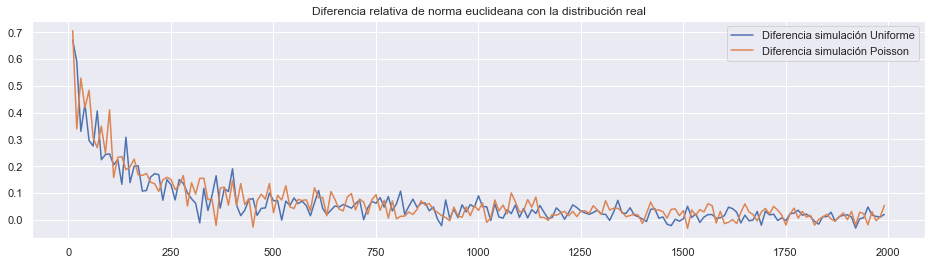

In [134]:
# Diferencia simulaciones

dif_unif=[]
dif_pois=[]
for i in range(1,2000,10):
    sim=samplings(n=i)
    sim_real=sim_real_n(i)
    dif_unif.append(1-(np.linalg.norm(sim[0])/np.linalg.norm(sim_real)))
    dif_pois.append(1-(np.linalg.norm(sim[1])/np.linalg.norm(sim_real)))

plt.figure(18, figsize=(16, 4))
plt.title('Diferencia relativa de norma euclideana con la distribución real')
plt.plot(np.arange(1,2000,10),dif_unif,label='Diferencia simulación Uniforme')
plt.plot(np.arange(1,2000,10),dif_pois,label='Diferencia simulación Poisson')
plt.legend()
plt.show()

## Parte 2:

A continuación se realizará una estimación de $\mathbb{E}(Y_{\lambda,s})$ para una precisión de $0.2$ y nivel de confianza $95\%$. 

Para ello, en primer lugar se estima la cantidad necesaria de réplicas requeridas para tales parámetros de precisión y confianza, y posteriormente se estima lo pedido.

Para un mejor análisis posterior, notemos que para $\lambda=1$, $\mathbb{E}(Y_{\lambda,s})=1$.

En efecto, 

$$\mathbb{E}(Y_{\lambda,s})=\displaystyle\sum_{k=0}^sk\cdot\mathbb{P}(Y_{\lambda,s}=k)=\frac{\mathbb{E}(P)}{\displaystyle\sum_{j=0}^se^{-\lambda}\frac{\lambda^j}{j!}}=\frac{\mathbb{E}(P)}{\lambda\cdot\mathbb{E}(P)}=1$$





In [135]:
## Calculamos la varianza teórica y emirica de ambos métodos

Err = 0.2 ; Pr = 0.95 ; Zalpha005 = sp.stats.norm.ppf(Pr)

var_teo =np.var(sim_real_n(100000),ddof=1)
varYN = np.var(simulacion[0], ddof=1)
varPN = np.var(simulacion[1], ddof=1)

print('Las varianzas teorica, producida por la uniforme y producida por las Poisson son')
print('Teórica=',var_teo)
print('Uniformes=',varYN)
print('Poisson=',varPN)

# cálculo del n requerido para precisión y confianza dados
n_teo = var_teo*(Zalpha005 / Err)**2
n_unif = varYN*(Zalpha005 / Err)**2
n_poisson = varPN*(Zalpha005 / Err)**2

print('El n necesario teóricamente es',int(np.ceil(n_teo)))
print('El n para convergencia para método de uniformes es',int(np.ceil(n_unif)))
print('Por otro lado, para el método con Poisson, el n apropiado es',int(np.ceil(n_poisson)))

Las varianzas teorica, producida por la uniforme y producida por las Poisson son
Teórica= 1.0005499910999112
Uniformes= 0.990189408940894
Poisson= 1.0226460146014602
El n necesario teóricamente es 68
El n para convergencia para método de uniformes es 67
Por otro lado, para el método con Poisson, el n apropiado es 70


In [136]:
## Estimación esperanza

uniforme = []
poisson = []
tiemposuniforme = []
tiempospoisson = []
NN=np.arange(1,1001,1)
unifs1=0
unifs2=0

for i in NN:
    # implementación métodos
    sim = samplings(n=i)
    if i<n_unif:
        unifs1+=sim[4]
    if i<n_poisson:
        unifs2+=sim[5]
    unif, pois, timeunif, timepois = sim[0],sim[1],sim[2],sim[3]
    
    #estimación esperanza
    espunif, esppois = sum(unif) / i, sum(pois) / i
    
    uniforme.append(espunif)
    poisson.append(esppois)
    tiemposuniforme.append(timeunif)
    tiempospoisson.append(timepois)

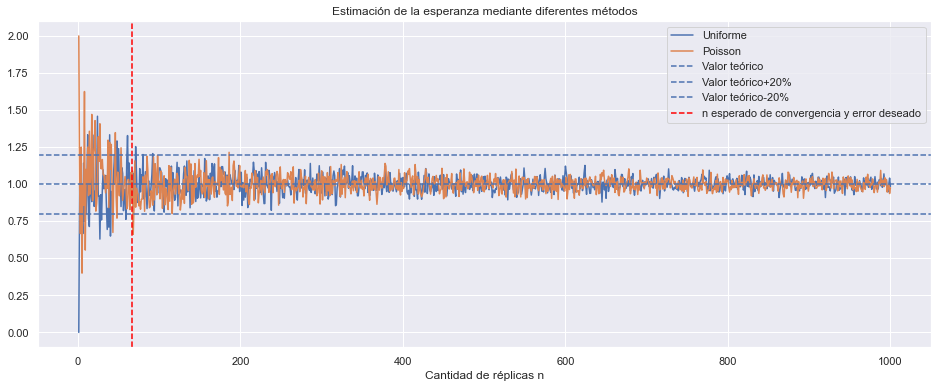

La esperanza estimada en el n* por uniformes es 0.8840579710144928
La esperanza estimada en el n* por Poisson es 0.855072463768116


In [137]:
### Gráfico de la esperanza simulada
plt.figure(19, figsize=(16, 6))
plt.title('Estimación de la esperanza mediante diferentes métodos')
plt.plot(NN, uniforme, label='Uniforme')
plt.plot(NN, poisson, label='Poisson')
plt.axhline(1, linestyle='--', label='Valor teórico')
plt.axhline(1.2, linestyle='--', label='Valor teórico+20%')
plt.axhline(0.8, linestyle='--', label='Valor teórico-20%')
plt.axvline(n_unif, linestyle='--',label='n esperado de convergencia y error deseado',color='red')
plt.xlabel('Cantidad de réplicas n')
plt.legend()
plt.show()
print('La esperanza estimada en el n* por uniformes es', uniforme[68])
print('La esperanza estimada en el n* por Poisson es', poisson[68])

Como se puede ver, ambos entran en las condiciones deseadas y son muy cercanos al valor teórico.

A continuación se presenta un gráfico con los tiempos de ejecución de ambos métodos.

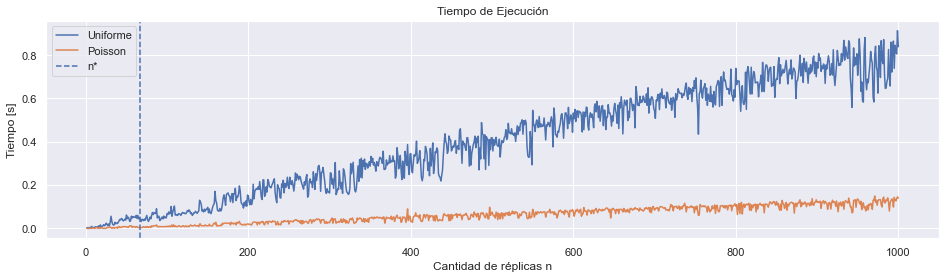

In [138]:
### Gráfico tiempos de ejecución

plt.figure(20, figsize=(16, 4))
plt.title('Tiempo de Ejecución')
plt.plot(NN, tiemposuniforme, label='Uniforme')
plt.plot(NN, tiempospoisson, label='Poisson')
plt.axvline(n_unif,linestyle='--',label='n*')
plt.xlabel('Cantidad de réplicas n')
plt.ylabel('Tiempo [s]')
plt.legend()
plt.show()

In [139]:
print('La cantidad de uniformes necesarias para usar el método de la uniforme discreta es', unifs1)
print('Mientras que para el método con Poisson es', unifs2)

La cantidad de uniformes necesarias para usar el método de la uniforme discreta es 35168
Mientras que para el método con Poisson es 7271


Finalmente, es posible determinar tanto por su precisión, tiempo de ejecución y cantidad de simulaciones requeridas, que el método de aceptación-rechazo que utiliza variables Poisson es más eficiente que aquel que utiliza variables Uniforme.

&lt;numpy.random._mt19937.MT19937 at 0x1e36c5f0b30&gt;